In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re

In [2]:
os.getcwd()

'C:\\Users\\IN0202'

In [3]:
os.chdir(r"D:\Personal\Analytics course\IPBA\Text Mining\Assignment")

In [ ]:
#!pip install nltk # natural language tool kit

In [ ]:
#!pip install wordcloud

In [4]:
import nltk

In [30]:
Amazon_reviews = pd.read_csv("Consumer_Reviews_of_Amazon_Products_May19.csv")

In [31]:
Amazon_reviews.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews_didPurchase,reviews_doRecommend,reviews_id,reviews_numHelpful,reviews_rating,reviews_sourceURLs,reviews_text,reviews_title,reviews_username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [32]:
Amazon_reviews.shape ## answer to question 1

(28332, 24)

In [159]:
Amazon_reviews.isnull().sum()

id                         0
dateAdded                  0
dateUpdated                0
name                       0
asins                      0
brand                      0
categories                 0
primaryCategories          0
imageURLs                  0
keys                       0
manufacturer               0
manufacturerNumber         0
reviews_date               0
reviews_dateSeen           0
reviews_didPurchase    28323
reviews_doRecommend    12246
reviews_id             28291
reviews_numHelpful     12217
reviews_rating             0
reviews_sourceURLs         0
reviews_text               0
reviews_title              0
reviews_username           0
sourceURLs                 0
neg_text               27367
dtype: int64

In [33]:
## import the required libraries
import seaborn as sns 
import matplotlib.pyplot as plt 

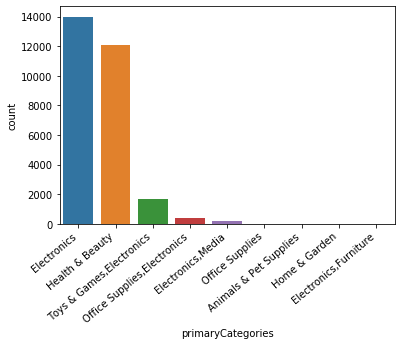

In [40]:
plt1=sns.countplot(x='primaryCategories',data=reviews,order=Amazon_reviews['primaryCategories'].value_counts().index)
## do this so that the x-axis values dont overlap with each other and the axis values are readable. The rotation is at 40-deg
plt1.set_xticklabels(plt1.get_xticklabels(), rotation=40, ha="right") 
# the plot indicates that Electronics is the highest category product reviews - answer to question #2
plt.show()

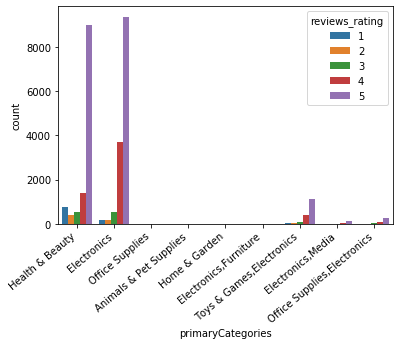

In [41]:
plt2 = sns.countplot(x='primaryCategories',hue = 'reviews_rating', data=Amazon_reviews)
plt2.set_xticklabels(plt2.get_xticklabels(), rotation=40, ha="right")
# the plot indicates that review rating of 1 is highest for Health & Beauty - answer to question #3
plt.show()

In [115]:
## import the required libraries
from string import punctuation
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation

In [74]:
# get the reviews text with rating of 1 as a string
neg_reviews_combined = " ".join(Amazon_reviews.reviews_text[Amazon_reviews.reviews_rating ==1])
neg_reviews_combined

'I don\'t know if I would buy thus brand again seems like they don\'t last as long as Duracell These do not last long at all very cheap batteries no happy These batteries are horrible. We depend on AA batteries for many wireless microphone and have found that brand-name batteries last about a month per our usage. We switched to Amazon basics to try it out when a subscription for our preferred brand was no longer available and have found that, under the same usage, these batteries last about a week. That\'s a 1/4 capacity. First time I bought these they worked well and lasted almost as long as the name brands. Not the same this time around, almost no charge - 4-6 hours of run time - Junk batteries. These batteries don\'t last even in a simple digital clock. 2 weeks at best. Date on the back of these were 1992. Yeah, 1992. Inedible. Battery storage life only lasted 8 months (stored indoors). During my first recharging they were leaking and wrapping was coming off. A waste of money These 

In [60]:
## if not installed - do the same 
#!pip install pip -U --user
#!pip install setuptools -U --user
#!pip install -U spacy --user

In [61]:
#Downloading CNN (Convolutional Neural Network) based Pre trained model.
#!python -m spacy download en_core_web_sm

In [62]:
## import the required libraries
import spacy
from spacy import displacy

In [63]:
# import the following module
import en_core_web_sm 

In [64]:
## assign to nlp
nlp = en_core_web_sm.load()

In [65]:
# start with a null result
res = []

In [66]:
# do the POS for the negative review texts
doc = nlp(neg_reviews_combined)

for token in doc:
    res.append([token.text, token.lemma_, token.pos_, token.tag_, token.is_alpha, token.is_stop])

In [76]:
# print the first 50 words and their POS 
pd.DataFrame(res,columns=["text","lemma_","pos","tag","is_alpha","is_stop"]).head(50)
# the 50th word is not seems - hence we may need to do data cleaning. Though "seems" is on the 11th word with VBZ as POS

,text,lemma_,pos,tag,is_alpha,is_stop
0,I,-PRON-,PRON,PRP,True,True
1,do,do,AUX,VBP,True,True
2,n't,not,PART,RB,False,True
3,know,know,VERB,VB,True,False
4,if,if,SCONJ,IN,True,True
5,I,-PRON-,PRON,PRP,True,True
6,would,would,VERB,MD,True,True
7,buy,buy,VERB,VB,True,False
8,thus,thus,ADV,RB,True,True
9,brand,brand,NOUN,NN,True,False


In [120]:
## as UDF to clean the text for spaces, punctuations, stop words etc
def clean_txt(sent):
    #Stripping white spaces before and after the text
    sent = sent.strip()
    #Replacing multiple spaces with a single space
    result = re.sub("\s+", " ", sent)
    #Replacing Non-Alpha-numeric and non space charecters with nothing
    result1 = re.sub("[^\w\s]+","",result)
    tokens = word_tokenize(sent.lower())
    stop_updated = stopwords.words("english") + list(punctuation) 
    text = [term for term in tokens if term not in stop_updated  and len(term) > 2] 
    res = " ".join(text)
    return res

In [121]:
# clean the review texts (rating of 1) with the UDF above
neg_reviews_combined_clean = Amazon_reviews.reviews_text[Amazon_reviews.reviews_rating ==1].apply(clean_txt)

In [122]:
# take these as a string to determine the POS for "seems"
neg_reviews_combined_clean_text = " ".join(neg_reviews_combined_clean)
neg_reviews_combined_clean_text

"n't know would buy thus brand seems like n't last long duracell last long cheap batteries happy batteries horrible depend batteries many wireless microphone found brand-name batteries last month per usage switched amazon basics try subscription preferred brand longer available found usage batteries last week 1/4 capacity first time bought worked well lasted almost long name brands time around almost charge 4-6 hours run time junk batteries batteries n't last even simple digital clock weeks best date back 1992. yeah 1992. inedible battery storage life lasted months stored indoors first recharging leaking wrapping coming waste money n't last long lasted week electric toothbrush energizer duracell brand lasted month tried different amazon batteries results dissatisfied batteries came dead return got new ones second order first.update still yet receive refund second order several weeks dead days old amazon fire stick quit working system fine seemed like remote n't getting juice tried diff

In [123]:
## search and find where we find "seems" - to check if this comes in the refined text and at what position
import re
match = re.search("seems", neg_reviews_combined_clean_text)
match
#re.findall("seems", neg_reviews_combined_clean_text).index

<re.Match object; span=(30, 35), match='seems'>

In [124]:
# reset the res 
res = []

In [125]:
# do the POS on the cleaned negavite review texts (rating of 1)
doc = nlp(neg_reviews_combined_clean_text)

for token in doc:
    res.append([token.text, token.lemma_, token.pos_, token.tag_, token.is_alpha, token.is_stop])

In [126]:
# print the outcome for first 50 words
pd.DataFrame(res,columns=["text","lemma_","pos","tag","is_alpha","is_stop"]).head(50)
# the 50th word is not seems still. So may be something else was done in the quesiton which we need to check with business.

,text,lemma_,pos,tag,is_alpha,is_stop
0,n't,n't,PART,RB,False,True
1,know,know,VERB,VB,True,False
2,would,would,VERB,MD,True,True
3,buy,buy,VERB,VB,True,False
4,thus,thus,ADV,RB,True,True
5,brand,brand,NOUN,NN,True,False
6,seems,seem,VERB,VBZ,True,True
7,like,like,SCONJ,IN,True,False
8,n't,n't,PART,RB,False,True
9,last,last,ADJ,JJ,True,True


In [ ]:
## could not get the word "seems" in 50th word. But within the 50 words, the word "seems" has a POS of VBZ. 
## hence this is chosen as the answer - 4

In [129]:
## do the word cloud based on the cleaned text
from wordcloud import WordCloud
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(neg_reviews_combined_clean_text)

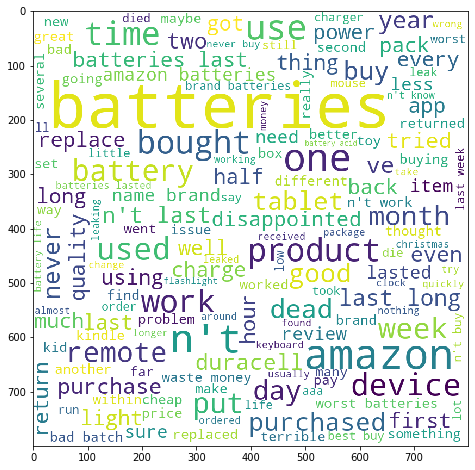

In [130]:
# plot the word cloud
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show() # answers to question 4

In [131]:
# clean he postive texts - those with a rating of 5
pos_reviews_combined_clean = Amazon_reviews.reviews_text[Amazon_reviews.reviews_rating ==5].apply(clean_txt)

In [132]:
# convert to a string
pos_reviews_combined_clean_text = " ".join(pos_reviews_combined_clean)
pos_reviews_combined_clean_text

"well duracell price happy seem work well name brand batteries much better price batteries long lasting price great bought lot batteries christmas amazonbasics cell good n't noticed difference brand name batteries amazon basic brand lot easier purchase arrive house hand buy ive problame batteries ordered past pleased well looking cheap non-rechargeable batteries last quite perfect nothing say find amazon basics batteries equal superior name brand ones n't believe n't start buying sooner packages large price great use fish tank light night works great love easily switch want guests got n't really comment good job good price quick delivery put two one keyboards year say three days many things need battery great thankful able find amazon great price even better shipping arrived perfect condition exactly needed great purchase would purchase second purchase amazon batteries work great good even better name brand batteries half price way purchase batteries last long duracell batteries xbox o

In [133]:
## do the word cloud based on the cleaned text for positive review comments (rating of 5)
from wordcloud import WordCloud
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(pos_reviews_combined_clean_text)

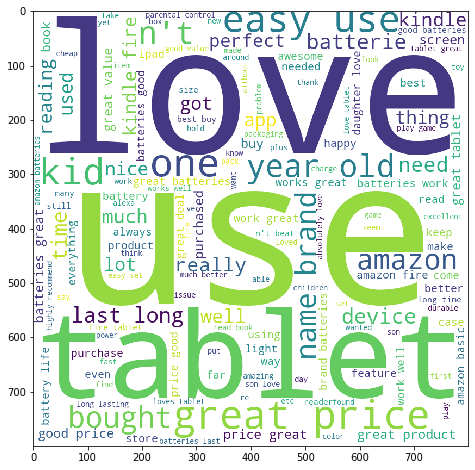

In [134]:
# plot the word cloud
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [135]:
# Neutral review comments are cleaned now (rating of 3)
neu_reviews_combined_clean = Amazon_reviews.reviews_text[Amazon_reviews.reviews_rating ==3].apply(clean_txt)

In [136]:
# convert to a string
neu_reviews_combined_clean_text = " ".join(neu_reviews_combined_clean)
neu_reviews_combined_clean_text

"order one item bad quality missing backup spring put pcs aluminum make battery work hold amount high power juice like energizer duracell half price first started getting amazon basic batteries really liked recent purchases seem last like maybe mixed-bag inconsistent lasting better others done tests feel brands may last longer however price hard beat bought batteries christmas gifts month december lasted like 2months toys need replacement batteries also used doorbell needs replacement batteries remote control still working batteries n't last long ... light thought fit light arrived nice company batteries needed fault knowing thanks.. got really wont kno eeeks good batteries put batteries window candles bought put last duracell amazon batteries lasted days duracell lasted 12. since 've experimented see consistent duracell last average longer sorry say 've disappointed n't last long remotes transmitters even store brand alkaline batteries n't last long cheap camera lithium n't expect las

In [137]:
## do the word cloud based on the cleaned text for neutral review comments (rating of 3)
from wordcloud import WordCloud
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(neu_reviews_combined_clean_text)

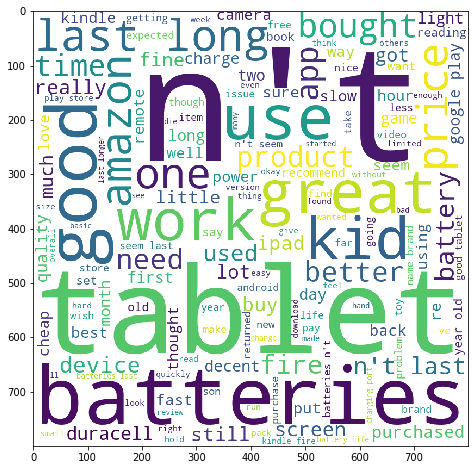

In [138]:
# plot the word cloud
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [145]:
# segregate the data for primaryCategories of "Electronics"
electronics = Amazon_reviews[Amazon_reviews.primaryCategories == "Electronics"]

In [149]:
# clean the review text for Electronics (rating of 5)
elec_pos_reviews_combined_clean = electronics.reviews_text[electronics.reviews_rating==5].apply(clean_txt)

In [150]:
# convert to string
elec_pos_reviews_combined_clean_text = " ".join(elec_pos_reviews_combined_clean)
elec_pos_reviews_combined_clean_text

"great case keep everything place husband love holds lot cds discarding getting rid broken cases broken cds selecting ones really like binder turned excellent option store favourite cds dvds keep small space living room giving choice donate get rid cds towers took lot room despite looking nice turn pages spot want play without hassle taking case falling apart storing cds cases printed covers went straight recycling centre small version put cds husband would like listen whenever must drive away work dollars boycotting amazon pros standard echo cons older generation echo thoughts arrived time new box pros got much impressive sound 2nd gen. every functionality cons may trendy looking newer still sets well kitchen island pros love alexa series one went sale get camera watch security cameras couch even drop see whats going places audio nice loud picture clear cons wish could stop screen turning keep thinking unplugged saving power guess n't sure even wanted item caught excitement surroundin

In [151]:
## do the word cloud based on the cleaned text for positive review comments (rating of 5) within Electronics category
from wordcloud import WordCloud
word_cloud = WordCloud(width=800,height=800,background_color='white',max_words=150).\
generate_from_text(elec_pos_reviews_combined_clean_text)

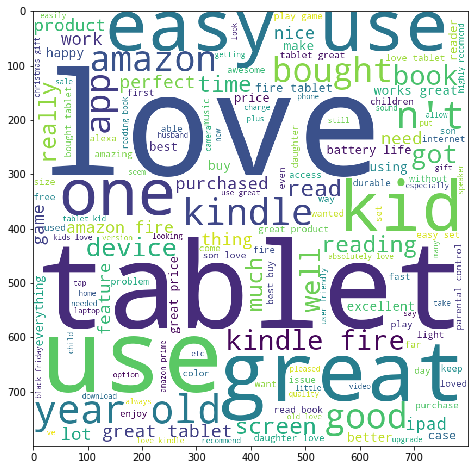

In [152]:
# plot the word cloud
plt.figure(figsize=[8,8])
plt.imshow(word_cloud)
plt.show()

In [153]:
# reset the res
res = []

In [155]:
# clean the review title for positive rating for Electronics (rating of 5)
elec_pos_reviews_title_combined_clean = electronics.reviews_title[electronics.reviews_rating==5].apply(clean_txt)

In [156]:
# convert to a string
elec_pos_reviews_title_combined_clean_text = " ".join(elec_pos_reviews_title_combined_clean)
elec_pos_reviews_title_combined_clean_text

"excellent product much needed storage worth arrived described much better sound sound 2nd generation great addition living room got one fire stick great product great prices quick simple easy use save money gone chromecast works tabrej ali last one 'works people found helpful review helpful yes great adjustment angles laptop runs super cool vibration sturdy people found helpful review helpful yes great adjustment angles laptop runs super cool vibration sturdy people found helpful review helpful yes great adjustment angles laptop runs super cool vibration sturdy people found helpful review helpful yes looking ... perfect laptop backback backpack five stars great backpack ... well worth money great stuff like different pockets keep gear ... many department idems perfectly design fitted ... one best backpacks 've ever owned sturdy winner perfect 339 people found helpful review helpful yes perfect 340 people found helpful review helpful yes perfect 342 people found helpful review helpful 

In [157]:
# find the POS
doc = nlp(elec_pos_reviews_title_combined_clean_text)

for token in doc:
    res.append([token.text, token.lemma_, token.pos_, token.tag_, token.is_alpha, token.is_stop])

In [158]:
# print the first 50 chars with POS
pd.DataFrame(res,columns=["text","lemma_","pos","tag","is_alpha","is_stop"]).head(50)

,text,lemma_,pos,tag,is_alpha,is_stop
0,excellent,excellent,ADJ,JJ,True,False
1,product,product,NOUN,NN,True,False
2,much,much,ADJ,JJ,True,True
3,needed,need,VERB,VBN,True,False
4,storage,storage,NOUN,NN,True,False
5,worth,worth,ADJ,JJ,True,False
6,arrived,arrive,VERB,VBD,True,False
7,described,describe,VERB,VBN,True,False
8,much,much,ADV,RB,True,True
9,better,well,ADJ,JJR,True,False


In [ ]:
## "much" word has the POS as RB as seen above - has POS values of ADJ/JJ in index 2 and ADV/RB in index 8. 
## Since the first 50 characters are required, the index of 2 is used (char position is 18 as indicated below) 
## which leads to JJ as the answer - Answer to Question 9

In [168]:
## search and find where we find "much" - to check if this comes in the refined text and at what position
import re
match = re.search("much", elec_pos_reviews_title_combined_clean_text)
match
#re.findall("seems", neg_reviews_combined_clean_text).index

<re.Match object; span=(18, 22), match='much'>